# Implementing Perceptron learning algorithm in python

## An object-oriented perceptron API

In [16]:
import numpy as np

class Perceptron(object):
    """ Perceptron classifier 
    Parameters
    -------------------
    eta : float
        learning rate(between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state : int
        random nuber generator for random weight
        initialization
        
    Attributes
    -------------------
    w_ : 1d-array
        weights after fitting 
    
    errors_ : list 
        Number of misclassification (updates) in each epochs
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ------------------
        X : (array-like) , shape = [n_samples , n_features]
            Training vectors, where n_samples is the number of 
            samples and
            n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ------------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step """
        return np.where(self.net_input(X) >= 0, 1, -1)

## Training a perceptron model on IRIS dataset

In [17]:
import pandas as pd
df = pd.read_csv('F:/Study/[FreeTutorials.Us] Udemy - machine-learning-course-with-python/New folder/Projects/IRIS Flowers/iris.data' , header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


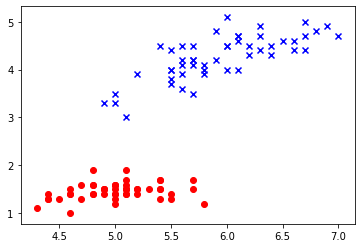

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#Select Setosa and Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

#Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#Plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')

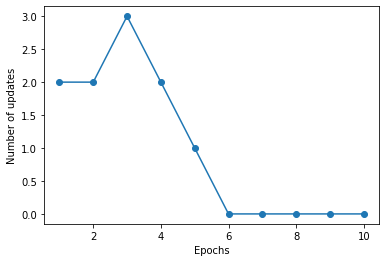

In [31]:
ppn = Perceptron(eta = 0.01, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## visualization of decision boundaries for two-dimensional datasets

<function matplotlib.pyplot.show(*args, **kw)>

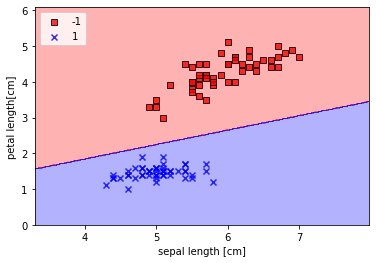

In [22]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X , y , classifier , resolution = 0.02):
    
    #setup marker generator and color map
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    #plot decision surface
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution),np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    #plot class samples
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter( x = X[y == cl , 0] , 
                     y = X[y == cl , 1] , 
                     alpha = 0.8 , 
                     c = colors[idx] , 
                     marker = markers[idx] , 
                     label = cl ,
                     edgecolor = 'black'
        )
        
plot_decision_regions(X , y , classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc = 'upper left')
plt.show


In [39]:
ppn.predict([7.6, 8.9])

array(-1)